In [2]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import sys

# Generate csv for instance level RT summary

In [56]:
first_round_csv_path = "/Users/kiyoshi/Desktop/mturk_results/first_round_40_classes/0703_human/v3_processed.csv"
sec_round_csv_path = "/Users/kiyoshi/Desktop/mturk_results/second_round_40_classes/0730/processed.csv"

In [57]:
original_csv_pd = pd.read_csv(first_round_csv_path)

In [58]:
header = ["index", "assignment_id", "survey_index", "date_time", "host", "novel_class", "answer", "correct", "image_list", "rt"]
original_csv_pd.columns = header

In [59]:
rt_pd = original_csv_pd[["novel_class", "image_list", "rt"]]

In [60]:
img_pd = rt_pd.image_list.str.split(',',expand=True)

In [61]:
img_header = ["img1","img2","img3","img4","img5","img6"]
img_pd.columns = img_header

In [62]:
img_pd = img_pd[["img1","img2","img3","img4","img5"]]
img_pd.head(3)

img1  \
0  'dataset_v1/known_classes/images/val/00330/000...   
1  'dataset_v1/known_classes/images/val/00190/000...   
2  'dataset_v1/known_classes/images/val/00118/000...   

                                                img2  \
0   'dataset_v1/known_classes/images/val/00330/00...   
1   'dataset_v1/known_classes/images/val/00118/00...   
2   'dataset_v1/known_classes/images/val/00118/00...   

                                                img3  \
0   'dataset_v1/known_classes/images/val/00330/00...   
1   'dataset_v1/known_classes/images/val/00190/00...   
2   'dataset_v1/known_classes/images/val/00118/00...   

                                                img4  \
0   'dataset_v1/known_classes/images/val/00082/00...   
1   'dataset_v1/known_classes/images/val/00190/00...   
2   'dataset_v1/known_classes/images/val/00001/00...   

                                                img5  
0   'dataset_v1/known_classes/images/val/00330/00...  
1   'dataset_v1/known_classes/images/val/00190/00...  
2   'dataset_v1/known_classes/images/val/00118/00...

In [63]:
rt_img_pd = pd.concat([rt_pd, img_pd], axis=1)

In [65]:
del rt_img_pd['image_list']

In [66]:
rt_img_pd.head(3)

novel_class    rt                                               img1  \
0           82  1396  'dataset_v1/known_classes/images/val/00330/000...   
1          118  1668  'dataset_v1/known_classes/images/val/00190/000...   
2            1  2459  'dataset_v1/known_classes/images/val/00118/000...   

                                                img2  \
0   'dataset_v1/known_classes/images/val/00330/00...   
1   'dataset_v1/known_classes/images/val/00118/00...   
2   'dataset_v1/known_classes/images/val/00118/00...   

                                                img3  \
0   'dataset_v1/known_classes/images/val/00330/00...   
1   'dataset_v1/known_classes/images/val/00190/00...   
2   'dataset_v1/known_classes/images/val/00118/00...   

                                                img4  \
0   'dataset_v1/known_classes/images/val/00082/00...   
1   'dataset_v1/known_classes/images/val/00190/00...   
2   'dataset_v1/known_classes/images/val/00001/00...   

                                                img5  
0   'dataset_v1/known_classes/images/val/00330/00...  
1   'dataset_v1/known_classes/images/val/00190/00...  
2   'dataset_v1/known_classes/images/val/00118/00...

In [67]:
rt_img_pd.reset_index(drop=True).to_csv(path_or_buf="/Users/kiyoshi/Desktop/mturk_results/first_round_40_classes/instance_rt.csv")

# process csv and get instance level csv

In [100]:
first_round = "/Users/kiyoshi/Desktop/mturk_results/first_round_40_classes/instance_rt.csv"
save_first_round = "/Users/kiyoshi/Desktop/mturk_results/first_round_40_classes/instance_rt_processed.npy"

In [69]:
second_round = None

In [96]:
from numpy import genfromtxt
np_data = genfromtxt(first_round, delimiter=',', dtype=None, encoding="utf-8")

In [97]:
np_data[1]

(0, '82', '1396', "'dataset_v1/known_classes/images/val/00330/00076.JPEG'", " 'dataset_v1/known_classes/images/val/00330/00025.JPEG'", " 'dataset_v1/known_classes/images/val/00330/00045.JPEG'", " 'dataset_v1/known_classes/images/val/00082/00018.JPEG'", " 'dataset_v1/known_classes/images/val/00330/00007.JPEG'")

In [112]:
save_data = []

for i in range(1, np_data.shape[0]):
# for i in range(1, 100):
    one_row = np_data[i]
    img_path = None
    
    class_label = one_row[1]
    rt = one_row[2]
    
    img_1_label = one_row[3][37:42]
    img_2_label = one_row[4][38:43]
    img_3_label = one_row[5][38:43]
    img_4_label = one_row[6][38:43]
    img_5_label = one_row[7][38:43]
        
    if class_label.zfill(5) == img_1_label:
        img_path = one_row[3][36:-1]
    elif class_label.zfill(5) == img_2_label:
        img_path = one_row[4][37:-1]
    elif class_label.zfill(5) == img_3_label:
        img_path = one_row[5][37:-1]
    elif class_label.zfill(5) == img_4_label:
        img_path = one_row[6][37:-1]
    elif class_label.zfill(5) == img_5_label:
        img_path = one_row[7][37:-1]
        
    print(img_path)
    
    save_data.append([img_path[1:6], img_path[7:] , rt])
    
np.save(save_first_round, save_data)
print("NPY file saved!")

/00082/00018.JPEG
/00118/00035.JPEG
/00001/00416.JPEG
/00082/00018.JPEG
/00082/00018.JPEG
/00118/00035.JPEG
/00082/00018.JPEG
/00118/00035.JPEG
/00082/00018.JPEG
/00118/00035.JPEG
/00082/00018.JPEG
/00082/00018.JPEG
/00118/00035.JPEG
/00118/00035.JPEG
/00001/00416.JPEG
/00319/00078.JPEG
/00082/00018.JPEG
/00001/00416.JPEG
/00099/00035.JPEG
/00319/00078.JPEG
/00099/00035.JPEG
/00398/00009.JPEG
/00001/00416.JPEG
/00257/00091.JPEG
/00257/00091.JPEG
/00398/00009.JPEG
/00190/00064.JPEG
/00288/00060.JPEG
/00099/00035.JPEG
/00330/00042.JPEG
/00190/00064.JPEG
/00288/00060.JPEG
/00194/00093.JPEG
/00319/00078.JPEG
/00001/00484.JPEG
/00118/00035.JPEG
/00194/00093.JPEG
/00267/00098.JPEG
/00176/00040.JPEG
/00176/00040.JPEG
/00191/00028.JPEG
/00001/00241.JPEG
/00398/00009.JPEG
/00099/00035.JPEG
/00257/00091.JPEG
/00388/00090.JPEG
/00118/00001.JPEG
/00232/00068.JPEG
/00232/00068.JPEG
/00398/00009.JPEG
/00288/00060.JPEG
/00130/00047.JPEG
/00190/00064.JPEG
/00190/00064.JPEG
/00190/00002.JPEG
/00190/000

/00118/00029.JPEG
/00097/00009.JPEG
/00002/00010.JPEG
/00190/00075.JPEG
/00398/00017.JPEG
/00313/00097.JPEG
/00105/00004.JPEG
/00398/00088.JPEG
/00398/00082.JPEG
/00136/00074.JPEG
/00117/00062.JPEG
/00261/00017.JPEG
/00105/00014.JPEG
/00267/00008.JPEG
/00261/00009.JPEG
/00117/00076.JPEG
/00198/00045.JPEG
/00359/00087.JPEG
/00082/00006.JPEG
/00359/00072.JPEG
/00359/00072.JPEG
/00100/00032.JPEG
/00105/00050.JPEG
/00178/00077.JPEG
/00098/00060.JPEG
/00232/00058.JPEG
/00082/00053.JPEG
/00094/00050.JPEG
/00257/00039.JPEG
/00388/00087.JPEG
/00288/00068.JPEG
/00082/00066.JPEG
/00075/00036.JPEG
/00075/00022.JPEG
/00288/00092.JPEG
/00130/00098.JPEG
/00178/00077.JPEG
/00190/00008.JPEG
/00288/00098.JPEG
/00075/00097.JPEG
/00136/00019.JPEG
/00105/00045.JPEG
/00261/00036.JPEG
/00286/00063.JPEG
/00232/00058.JPEG
/00313/00057.JPEG
/00136/00074.JPEG
/00082/00066.JPEG
/00136/00013.JPEG
/00075/00022.JPEG
/00286/00030.JPEG
/00178/00021.JPEG
/00330/00028.JPEG
/00117/00087.JPEG
/00075/00036.JPEG
/00288/000

/00319/00065.JPEG
/00330/00071.JPEG
/00257/00002.JPEG
/00313/00025.JPEG
/00224/00073.JPEG
/00232/00047.JPEG
/00198/00099.JPEG
/00286/00088.JPEG
/00100/00024.JPEG
/00193/00092.JPEG
/00384/00075.JPEG
/00330/00048.JPEG
/00137/00074.JPEG
/00178/00028.JPEG
/00099/00086.JPEG
/00097/00085.JPEG
/00117/00021.JPEG
/00258/00036.JPEG
/00313/00025.JPEG
/00288/00052.JPEG
/00388/00005.JPEG
/00198/00099.JPEG
/00136/00054.JPEG
/00384/00075.JPEG
/00075/00040.JPEG
/00001/00533.JPEG
/00232/00055.JPEG
/00258/00031.JPEG
/00130/00035.JPEG
/00118/00022.JPEG
/00232/00081.JPEG
/00176/00087.JPEG
/00130/00074.JPEG
/00232/00081.JPEG
/00103/00007.JPEG
/00117/00067.JPEG
/00198/00020.JPEG
/00117/00067.JPEG
/00261/00095.JPEG
/00002/00018.JPEG
/00198/00013.JPEG
/00261/00095.JPEG
/00232/00081.JPEG
/00130/00065.JPEG
/00359/00095.JPEG
/00130/00065.JPEG
/00345/00005.JPEG
/00137/00023.JPEG
/00117/00067.JPEG
/00137/00023.JPEG
/00268/00078.JPEG
/00268/00078.JPEG
/00388/00047.JPEG
/00098/00033.JPEG
/00261/00095.JPEG
/00388/000

/00178/00075.JPEG
/00103/00042.JPEG
/00001/00283.JPEG
/00103/00042.JPEG
/00100/00074.JPEG
/00193/00073.JPEG
/00118/00048.JPEG
/00330/00076.JPEG
/00097/00008.JPEG
/00100/00074.JPEG
/00130/00048.JPEG
/00075/00052.JPEG
/00232/00052.JPEG
/00103/00042.JPEG
/00330/00076.JPEG
/00100/00074.JPEG
/00313/00078.JPEG
/00136/00031.JPEG
/00075/00013.JPEG
/00075/00052.JPEG
/00094/00040.JPEG
/00313/00029.JPEG
/00330/00076.JPEG
/00313/00042.JPEG
/00075/00052.JPEG
/00398/00091.JPEG
/00097/00041.JPEG
/00313/00078.JPEG
/00176/00021.JPEG
/00178/00075.JPEG
/00075/00013.JPEG
/00313/00078.JPEG
/00118/00048.JPEG
/00094/00040.JPEG
/00099/00019.JPEG
/00075/00013.JPEG
/00232/00052.JPEG
/00002/00011.JPEG
/00094/00040.JPEG
/00094/00066.JPEG
/00001/00283.JPEG
/00330/00027.JPEG
/00136/00031.JPEG
/00097/00008.JPEG
/00198/00087.JPEG
/00198/00086.JPEG
/00313/00042.JPEG
/00232/00040.JPEG
/00103/00042.JPEG
/00098/00076.JPEG
/00176/00021.JPEG
/00330/00027.JPEG
/00288/00068.JPEG
/00099/00019.JPEG
/00267/00026.JPEG
/00002/000

/00345/00091.JPEG
/00105/00079.JPEG
/00082/00024.JPEG
/00105/00079.JPEG
/00345/00091.JPEG
/00288/00046.JPEG
/00105/00079.JPEG
/00288/00046.JPEG
/00130/00026.JPEG
/00130/00026.JPEG
/00288/00046.JPEG
/00130/00072.JPEG
/00130/00072.JPEG
/00105/00086.JPEG
/00130/00026.JPEG
/00224/00093.JPEG
/00288/00093.JPEG
/00105/00091.JPEG
/00082/00098.JPEG
/00224/00093.JPEG
/00082/00057.JPEG
/00075/00014.JPEG
/00345/00030.JPEG
/00105/00091.JPEG
/00130/00072.JPEG
/00094/00040.JPEG
/00082/00098.JPEG
/00082/00057.JPEG
/00224/00093.JPEG
/00075/00014.JPEG
/00130/00009.JPEG
/00105/00040.JPEG
/00105/00091.JPEG
/00398/00035.JPEG
/00082/00098.JPEG
/00082/00024.JPEG
/00130/00053.JPEG
/00082/00057.JPEG
/00345/00091.JPEG
/00099/00083.JPEG
/00075/00014.JPEG
/00105/00079.JPEG
/00190/00013.JPEG
/00288/00046.JPEG
/00097/00040.JPEG
/00130/00026.JPEG
/00075/00088.JPEG
/00130/00053.JPEG
/00130/00072.JPEG
/00099/00083.JPEG
/00319/00035.JPEG
/00224/00093.JPEG
/00286/00079.JPEG
/00286/00003.JPEG
/00105/00091.JPEG
/00384/000

/00359/00036.JPEG
/00191/00001.JPEG
/00100/00086.JPEG
/00117/00012.JPEG
/00190/00110.JPEG
/00105/00066.JPEG
/00082/00060.JPEG
/00075/00006.JPEG
/00261/00086.JPEG
/00194/00005.JPEG
/00345/00016.JPEG
/00002/00023.JPEG
/00178/00084.JPEG
/00193/00017.JPEG
/00232/00082.JPEG
/00118/00040.JPEG
/00097/00001.JPEG
/00257/00015.JPEG
/00398/00024.JPEG
/00176/00038.JPEG
/00100/00012.JPEG
/00100/00012.JPEG
/00105/00093.JPEG
/00176/00031.JPEG
/00176/00031.JPEG
/00190/00083.JPEG
/00100/00026.JPEG
/00178/00096.JPEG
/00100/00026.JPEG
/00001/00020.JPEG
/00261/00026.JPEG
/00100/00012.JPEG
/00261/00026.JPEG
/00176/00031.JPEG
/00191/00001.JPEG
/00117/00012.JPEG
/00100/00026.JPEG
/00191/00001.JPEG
/00082/00060.JPEG
/00117/00012.JPEG
/00261/00026.JPEG
/00075/00006.JPEG
/00082/00060.JPEG
/00345/00016.JPEG
/00075/00006.JPEG
/00191/00001.JPEG
/00002/00023.JPEG
/00117/00012.JPEG
/00345/00016.JPEG
/00082/00060.JPEG
/00232/00082.JPEG
/00002/00023.JPEG
/00118/00040.JPEG
/00075/00006.JPEG
/00097/00001.JPEG
/00257/000

/00191/00033.JPEG
/00398/00020.JPEG
/00232/00016.JPEG
/00137/00033.JPEG
/00261/00095.JPEG
/00002/00035.JPEG
/00137/00045.JPEG
/00268/00087.JPEG
/00098/00027.JPEG
/00105/00055.JPEG
/00313/00077.JPEG
/00190/00020.JPEG
/00075/00061.JPEG
/00330/00030.JPEG
/00103/00027.JPEG
/00388/00084.JPEG
/00178/00097.JPEG
/00198/00079.JPEG
/00388/00049.JPEG
/00136/00097.JPEG
/00313/00077.JPEG
/00105/00055.JPEG
/00191/00033.JPEG
/00398/00020.JPEG
/00198/00079.JPEG
/00388/00049.JPEG
/00232/00016.JPEG
/00136/00097.JPEG
/00105/00055.JPEG
/00261/00095.JPEG
/00002/00035.JPEG
/00191/00033.JPEG
/00398/00020.JPEG
/00232/00016.JPEG
/00137/00045.JPEG
/00268/00087.JPEG
/00261/00095.JPEG
/00098/00027.JPEG
/00002/00035.JPEG
/00105/00055.JPEG
/00137/00045.JPEG
/00190/00020.JPEG
/00075/00061.JPEG
/00268/00087.JPEG
/00098/00027.JPEG
/00330/00030.JPEG
/00103/00027.JPEG
/00105/00055.JPEG
/00190/00020.JPEG
/00388/00084.JPEG
/00075/00061.JPEG
/00178/00097.JPEG
/00330/00030.JPEG
/00103/00027.JPEG
/00388/00084.JPEG
/00178/000

/00118/00071.JPEG
/00258/00014.JPEG
/00257/00091.JPEG
/00232/00090.JPEG
/00384/00066.JPEG
/00267/00094.JPEG
/00082/00061.JPEG
/00384/00009.JPEG
/00258/00014.JPEG
/00257/00091.JPEG
/00384/00066.JPEG
/00193/00055.JPEG
/00082/00061.JPEG
/00190/00075.JPEG
/00232/00090.JPEG
/00258/00014.JPEG
/00267/00094.JPEG
/00100/00057.JPEG
/00384/00009.JPEG
/00257/00091.JPEG
/00193/00055.JPEG
/00190/00075.JPEG
/00100/00057.JPEG
/00232/00090.JPEG
/00267/00094.JPEG
/00384/00009.JPEG
/00198/00026.JPEG
/00198/00026.JPEG
/00193/00055.JPEG
/00224/00087.JPEG
/00224/00087.JPEG
/00176/00041.JPEG
/00190/00075.JPEG
/00176/00041.JPEG
/00100/00057.JPEG
/00098/00075.JPEG
/00232/00016.JPEG
/00098/00075.JPEG
/00100/00084.JPEG
/00232/00016.JPEG
/00267/00008.JPEG
/00359/00040.JPEG
/00100/00084.JPEG
/00198/00026.JPEG
/00137/00084.JPEG
/00224/00087.JPEG
/00105/00044.JPEG
/00359/00040.JPEG
/00267/00008.JPEG
/00176/00041.JPEG
/00198/00066.JPEG
/00137/00084.JPEG
/00098/00075.JPEG
/00232/00016.JPEG
/00105/00044.JPEG
/00097/000

/00345/00050.JPEG
/00105/00004.JPEG
/00313/00099.JPEG
/00198/00028.JPEG
/00193/00001.JPEG
/00261/00071.JPEG
/00191/00102.JPEG
/00191/00077.JPEG
/00002/00031.JPEG
/00105/00004.JPEG
/00313/00099.JPEG
/00198/00028.JPEG
/00193/00001.JPEG
/00094/00088.JPEG
/00094/00088.JPEG
/00190/00014.JPEG
/00176/00090.JPEG
/00002/00028.JPEG
/00137/00079.JPEG
/00313/00059.JPEG
/00224/00056.JPEG
/00330/00036.JPEG
/00190/00014.JPEG
/00082/00069.JPEG
/00176/00090.JPEG
/00002/00084.JPEG
/00136/00013.JPEG
/00002/00028.JPEG
/00130/00037.JPEG
/00137/00079.JPEG
/00313/00059.JPEG
/00261/00071.JPEG
/00261/00071.JPEG
/00191/00102.JPEG
/00191/00102.JPEG
/00191/00077.JPEG
/00002/00031.JPEG
/00224/00056.JPEG
/00105/00004.JPEG
/00330/00036.JPEG
/00313/00099.JPEG
/00198/00028.JPEG
/00082/00069.JPEG
/00193/00001.JPEG
/00261/00071.JPEG
/00191/00102.JPEG
/00191/00077.JPEG
/00094/00088.JPEG
/00002/00031.JPEG
/00105/00004.JPEG
/00313/00099.JPEG
/00002/00084.JPEG
/00190/00014.JPEG
/00198/00028.JPEG
/00193/00001.JPEG
/00176/000

/00176/00090.JPEG
/00130/00034.JPEG
/00137/00086.JPEG
/00002/00038.JPEG
/00258/00014.JPEG
/00176/00090.JPEG
/00313/00015.JPEG
/00137/00086.JPEG
/00178/00051.JPEG
/00288/00033.JPEG
/00313/00015.JPEG
/00267/00086.JPEG
/00286/00037.JPEG
/00288/00033.JPEG
/00178/00051.JPEG
/00286/00037.JPEG
/00267/00000.JPEG
/00193/00014.JPEG
/00267/00000.JPEG
/00193/00014.JPEG
/00191/00119.JPEG
/00257/00099.JPEG
/00117/00058.JPEG
/00191/00119.JPEG
/00117/00058.JPEG
/00319/00002.JPEG
/00190/00083.JPEG
/00190/00083.JPEG
/00130/00034.JPEG
/00330/00038.JPEG
/00330/00038.JPEG
/00257/00099.JPEG
/00002/00038.JPEG
/00075/00008.JPEG
/00258/00014.JPEG
/00075/00008.JPEG
/00176/00090.JPEG
/00137/00086.JPEG
/00001/00367.JPEG
/00001/00367.JPEG
/00313/00015.JPEG
/00288/00033.JPEG
/00286/00037.JPEG
/00319/00002.JPEG
/00267/00086.JPEG
/00267/00000.JPEG
/00191/00119.JPEG
/00178/00051.JPEG
/00117/00058.JPEG
/00130/00034.JPEG
/00190/00083.JPEG
/00193/00014.JPEG
/00002/00038.JPEG
/00330/00038.JPEG
/00075/00008.JPEG
/00257/000

/00001/00481.JPEG
/00286/00023.JPEG
/00384/00061.JPEG
/00097/00033.JPEG
/00330/00032.JPEG
/00178/00056.JPEG
/00002/00044.JPEG
/00075/00008.JPEG
/00103/00097.JPEG
/00099/00052.JPEG
/00100/00099.JPEG
/00286/00023.JPEG
/00232/00042.JPEG
/00097/00033.JPEG
/00082/00067.JPEG
/00178/00056.JPEG
/00194/00095.JPEG
/00075/00008.JPEG
/00097/00043.JPEG
/00100/00099.JPEG
/00232/00042.JPEG
/00082/00067.JPEG
/00194/00095.JPEG
/00097/00043.JPEG
/00137/00009.JPEG
/00191/00019.JPEG
/00094/00037.JPEG
/00094/00037.JPEG
/00261/00014.JPEG
/00105/00004.JPEG
/00384/00005.JPEG
/00286/00031.JPEG
/00094/00069.JPEG
/00267/00050.JPEG
/00261/00014.JPEG
/00198/00008.JPEG
/00105/00004.JPEG
/00075/00043.JPEG
/00384/00005.JPEG
/00001/00481.JPEG
/00384/00061.JPEG
/00094/00069.JPEG
/00267/00050.JPEG
/00330/00032.JPEG
/00261/00059.JPEG
/00002/00044.JPEG
/00103/00097.JPEG
/00099/00052.JPEG
/00098/00011.JPEG
/00286/00023.JPEG
/00097/00033.JPEG
/00286/00014.JPEG
/00345/00026.JPEG
/00136/00031.JPEG
/00178/00056.JPEG
/00075/000

/00388/00075.JPEG
/00130/00097.JPEG
/00103/00022.JPEG
/00286/00070.JPEG
/00288/00099.JPEG
/00330/00021.JPEG
/00100/00028.JPEG
/00082/00061.JPEG
/00194/00060.JPEG
/00136/00029.JPEG
/00267/00006.JPEG
/00258/00044.JPEG
/00268/00034.JPEG
/00261/00039.JPEG
/00178/00011.JPEG
/00191/00039.JPEG
/00345/00094.JPEG
/00398/00049.JPEG
/00224/00081.JPEG
/00388/00075.JPEG
/00103/00022.JPEG
/00268/00003.JPEG
/00130/00097.JPEG
/00286/00070.JPEG
/00082/00061.JPEG
/00288/00099.JPEG
/00267/00006.JPEG
/00258/00044.JPEG
/00330/00021.JPEG
/00268/00034.JPEG
/00261/00039.JPEG
/00100/00028.JPEG
/00345/00094.JPEG
/00194/00060.JPEG
/00224/00081.JPEG
/00388/00075.JPEG
/00136/00029.JPEG
/00103/00022.JPEG
/00286/00070.JPEG
/00288/00099.JPEG
/00178/00011.JPEG
/00330/00021.JPEG
/00100/00028.JPEG
/00194/00060.JPEG
/00191/00039.JPEG
/00136/00029.JPEG
/00178/00011.JPEG
/00191/00039.JPEG
/00398/00049.JPEG
/00398/00049.JPEG
/00268/00003.JPEG
/00130/00097.JPEG
/00082/00061.JPEG
/00267/00006.JPEG
/00258/00044.JPEG
/00268/000

/00130/00089.JPEG
/00288/00088.JPEG
/00001/00450.JPEG
/00137/00005.JPEG
/00130/00056.JPEG
/00094/00037.JPEG
/00130/00089.JPEG
/00288/00048.JPEG
/00288/00088.JPEG
/00330/00023.JPEG
/00257/00080.JPEG
/00001/00450.JPEG
/00075/00029.JPEG
/00130/00093.JPEG
/00224/00099.JPEG
/00257/00081.JPEG
/00257/00037.JPEG
/00193/00002.JPEG
/00105/00063.JPEG
/00257/00087.JPEG
/00097/00011.JPEG
/00261/00126.JPEG
/00100/00002.JPEG
/00001/00130.JPEG
/00359/00030.JPEG
/00286/00046.JPEG
/00288/00058.JPEG
/00191/00012.JPEG
/00191/00080.JPEG
/00288/00048.JPEG
/00330/00023.JPEG
/00257/00080.JPEG
/00075/00029.JPEG
/00130/00093.JPEG
/00224/00099.JPEG
/00257/00081.JPEG
/00257/00037.JPEG
/00193/00002.JPEG
/00105/00063.JPEG
/00257/00087.JPEG
/00097/00011.JPEG
/00261/00126.JPEG
/00100/00002.JPEG
/00001/00130.JPEG
/00359/00030.JPEG
/00286/00046.JPEG
/00288/00058.JPEG
/00191/00012.JPEG
/00191/00080.JPEG
/00288/00048.JPEG
/00288/00048.JPEG
/00330/00023.JPEG
/00257/00080.JPEG
/00075/00029.JPEG
/00330/00023.JPEG
/00130/000

/00191/00097.JPEG
/00176/00027.JPEG
/00313/00011.JPEG
/00232/00024.JPEG
/00232/00006.JPEG
/00398/00096.JPEG
/00359/00099.JPEG
/00224/00099.JPEG
/00359/00047.JPEG
/00075/00050.JPEG
/00117/00057.JPEG
/00267/00041.JPEG
/00094/00026.JPEG
/00103/00065.JPEG
/00136/00003.JPEG
/00267/00061.JPEG
/00117/00086.JPEG
/00176/00000.JPEG
/00105/00045.JPEG
/00198/00030.JPEG
/00191/00097.JPEG
/00176/00027.JPEG
/00313/00011.JPEG
/00232/00024.JPEG
/00286/00062.JPEG
/00286/00062.JPEG
/00094/00061.JPEG
/00384/00091.JPEG
/00288/00072.JPEG
/00094/00061.JPEG
/00118/00087.JPEG
/00384/00091.JPEG
/00098/00052.JPEG
/00288/00072.JPEG
/00319/00041.JPEG
/00002/00079.JPEG
/00118/00087.JPEG
/00330/00085.JPEG
/00267/00000.JPEG
/00098/00052.JPEG
/00288/00090.JPEG
/00319/00041.JPEG
/00105/00040.JPEG
/00002/00079.JPEG
/00286/00062.JPEG
/00257/00086.JPEG
/00330/00085.JPEG
/00267/00071.JPEG
/00094/00061.JPEG
/00267/00099.JPEG
/00384/00091.JPEG
/00267/00000.JPEG
/00288/00072.JPEG
/00193/00028.JPEG
/00118/00087.JPEG
/00098/000

/00191/00117.JPEG
/00137/00033.JPEG
/00267/00099.JPEG
/00137/00021.JPEG
/00099/00020.JPEG
/00232/00088.JPEG
/00097/00015.JPEG
/00288/00031.JPEG
/00082/00071.JPEG
/00136/00012.JPEG
/00258/00034.JPEG
/00130/00086.JPEG
/00224/00047.JPEG
/00258/00079.JPEG
/00136/00008.JPEG
/00099/00054.JPEG
/00398/00023.JPEG
/00191/00117.JPEG
/00267/00099.JPEG
/00099/00020.JPEG
/00097/00015.JPEG
/00288/00061.JPEG
/00002/00053.JPEG
/00345/00066.JPEG
/00137/00033.JPEG
/00137/00021.JPEG
/00232/00088.JPEG
/00288/00031.JPEG
/00082/00071.JPEG
/00136/00012.JPEG
/00258/00034.JPEG
/00130/00086.JPEG
/00224/00047.JPEG
/00258/00079.JPEG
/00136/00008.JPEG
/00099/00054.JPEG
/00398/00023.JPEG
/00191/00117.JPEG
/00267/00099.JPEG
/00099/00020.JPEG
/00097/00015.JPEG
/00098/00068.JPEG
/00258/00047.JPEG
/00198/00058.JPEG
/00224/00002.JPEG
/00001/00172.JPEG
/00384/00094.JPEG
/00359/00098.JPEG
/00190/00092.JPEG
/00388/00071.JPEG
/00388/00088.JPEG
/00130/00089.JPEG
/00268/00083.JPEG
/00105/00061.JPEG
/00100/00032.JPEG
/00194/000

/00258/00093.JPEG
/00136/00091.JPEG
/00319/00087.JPEG
/00176/00028.JPEG
/00258/00052.JPEG
/00359/00058.JPEG
/00097/00034.JPEG
/00319/00025.JPEG
/00224/00095.JPEG
/00178/00075.JPEG
/00232/00066.JPEG
/00232/00091.JPEG
/00097/00034.JPEG
/00103/00046.JPEG
/00094/00003.JPEG
/00198/00051.JPEG
/00330/00048.JPEG
/00384/00078.JPEG
/00319/00025.JPEG
/00330/00048.JPEG
/00224/00095.JPEG
/00257/00019.JPEG
/00384/00078.JPEG
/00193/00090.JPEG
/00257/00019.JPEG
/00100/00027.JPEG
/00100/00027.JPEG
/00193/00090.JPEG
/00103/00046.JPEG
/00117/00011.JPEG
/00268/00001.JPEG
/00261/00021.JPEG
/00268/00001.JPEG
/00117/00011.JPEG
/00100/00027.JPEG
/00261/00021.JPEG
/00176/00037.JPEG
/00384/00021.JPEG
/00176/00037.JPEG
/00224/00081.JPEG
/00268/00001.JPEG
/00384/00021.JPEG
/00100/00027.JPEG
/00117/00011.JPEG
/00224/00081.JPEG
/00094/00072.JPEG
/00178/00046.JPEG
/00359/00006.JPEG
/00178/00046.JPEG
/00176/00037.JPEG
/00117/00011.JPEG
/00094/00072.JPEG
/00388/00075.JPEG
/00384/00021.JPEG
/00398/00015.JPEG
/00100/000

/00288/00081.JPEG
/00288/00081.JPEG
/00267/00095.JPEG
/00388/00070.JPEG
/00130/00015.JPEG
/00130/00015.JPEG
/00194/00011.JPEG
/00224/00013.JPEG
/00224/00013.JPEG
/00105/00003.JPEG
/00082/00006.JPEG
/00191/00087.JPEG
/00359/00000.JPEG
/00191/00087.JPEG
/00319/00054.JPEG
/00319/00045.JPEG
/00176/00092.JPEG
/00002/00041.JPEG
/00288/00081.JPEG
/00319/00045.JPEG
/00130/00012.JPEG
/00130/00015.JPEG
/00002/00041.JPEG
/00224/00013.JPEG
/00258/00024.JPEG
/00191/00087.JPEG
/00198/00018.JPEG
/00319/00045.JPEG
/00288/00086.JPEG
/00002/00041.JPEG
/00288/00086.JPEG
/00330/00012.JPEG
/00330/00012.JPEG
/00267/00095.JPEG
/00267/00095.JPEG
/00194/00011.JPEG
/00194/00011.JPEG
/00105/00003.JPEG
/00105/00003.JPEG
/00319/00054.JPEG
/00319/00054.JPEG
/00130/00012.JPEG
/00258/00024.JPEG
/00130/00012.JPEG
/00330/00009.JPEG
/00136/00048.JPEG
/00258/00024.JPEG
/00198/00018.JPEG
/00103/00085.JPEG
/00097/00019.JPEG
/00330/00009.JPEG
/00198/00018.JPEG
/00105/00039.JPEG
/00136/00048.JPEG
/00384/00088.JPEG
/00103/000

/00257/00048.JPEG
/00118/00076.JPEG
/00313/00061.JPEG
/00178/00069.JPEG
/00288/00073.JPEG
/00319/00047.JPEG
/00082/00044.JPEG
/00257/00048.JPEG
/00313/00061.JPEG
/00137/00000.JPEG
/00288/00073.JPEG
/00319/00047.JPEG
/00105/00070.JPEG
/00137/00000.JPEG
/00257/00048.JPEG
/00224/00060.JPEG
/00224/00060.JPEG
/00319/00057.JPEG
/00103/00073.JPEG
/00190/00024.JPEG
/00103/00073.JPEG
/00136/00019.JPEG
/00398/00000.JPEG
/00319/00047.JPEG
/00268/00067.JPEG
/00345/00088.JPEG
/00268/00084.JPEG
/00098/00032.JPEG
/00137/00060.JPEG
/00398/00000.JPEG
/00388/00050.JPEG
/00319/00057.JPEG
/00388/00022.JPEG
/00384/00004.JPEG
/00100/00051.JPEG
/00384/00018.JPEG
/00388/00022.JPEG
/00136/00019.JPEG
/00137/00000.JPEG
/00313/00061.JPEG
/00118/00076.JPEG
/00082/00044.JPEG
/00384/00018.JPEG
/00137/00077.JPEG
/00098/00032.JPEG
/00105/00070.JPEG
/00257/00048.JPEG
/00137/00077.JPEG
/00100/00051.JPEG
/00319/00047.JPEG
/00118/00076.JPEG
/00190/00024.JPEG
/00082/00044.JPEG
/00137/00000.JPEG
/00345/00088.JPEG
/00178/000

/00176/00069.JPEG
/00176/00028.JPEG
/00288/00023.JPEG
/00258/00031.JPEG
/00268/00015.JPEG
/00398/00037.JPEG
/00198/00003.JPEG
/00261/00094.JPEG
/00330/00003.JPEG
/00097/00015.JPEG
/00136/00002.JPEG
/00075/00073.JPEG
/00359/00017.JPEG
/00097/00030.JPEG
/00198/00092.JPEG
/00193/00056.JPEG
/00176/00069.JPEG
/00288/00023.JPEG
/00359/00027.JPEG
/00384/00007.JPEG
/00267/00044.JPEG
/00286/00022.JPEG
/00257/00001.JPEG
/00258/00031.JPEG
/00388/00054.JPEG
/00176/00028.JPEG
/00137/00089.JPEG
/00268/00015.JPEG
/00398/00037.JPEG
/00191/00147.JPEG
/00198/00003.JPEG
/00261/00094.JPEG
/00082/00002.JPEG
/00330/00003.JPEG
/00388/00048.JPEG
/00097/00015.JPEG
/00136/00002.JPEG
/00359/00017.JPEG
/00094/00034.JPEG
/00388/00021.JPEG
/00100/00047.JPEG
/00359/00027.JPEG
/00384/00007.JPEG
/00176/00035.JPEG
/00267/00044.JPEG
/00257/00001.JPEG
/00286/00022.JPEG
/00224/00027.JPEG
/00176/00028.JPEG
/00388/00054.JPEG
/00137/00089.JPEG
/00191/00126.JPEG
/00191/00147.JPEG
/00286/00022.JPEG
/00286/00022.JPEG
/00082/000

/00103/00074.JPEG
/00130/00013.JPEG
/00100/00023.JPEG
/00100/00018.JPEG
/00136/00020.JPEG
/00359/00045.JPEG
/00099/00075.JPEG
/00082/00014.JPEG
/00257/00056.JPEG
/00178/00077.JPEG
/00137/00068.JPEG
/00191/00122.JPEG
/00130/00013.JPEG
/00002/00099.JPEG
/00190/00003.JPEG
/00130/00040.JPEG
/00176/00027.JPEG
/00232/00057.JPEG
/00359/00045.JPEG
/00330/00001.JPEG
/00191/00128.JPEG
/00098/00026.JPEG
/00118/00012.JPEG
/00190/00112.JPEG
/00099/00047.JPEG
/00100/00027.JPEG
/00130/00025.JPEG
/00345/00099.JPEG
/00286/00023.JPEG
/00191/00002.JPEG
/00261/00146.JPEG
/00194/00013.JPEG
/00075/00006.JPEG
/00359/00041.JPEG
/00268/00038.JPEG
/00098/00026.JPEG
/00099/00051.JPEG
/00288/00066.JPEG
/00100/00018.JPEG
/00261/00146.JPEG
/00190/00037.JPEG
/00193/00046.JPEG
/00099/00030.JPEG
/00098/00026.JPEG
/00190/00037.JPEG
/00002/00086.JPEG
/00257/00002.JPEG
/00178/00055.JPEG
/00258/00007.JPEG
/00288/00066.JPEG
/00137/00028.JPEG
/00099/00041.JPEG
/00082/00014.JPEG
/00002/00086.JPEG
/00190/00050.JPEG
/00288/000

/00288/00086.JPEG
/00288/00069.JPEG
/00190/00125.JPEG
/00001/00564.JPEG
/00261/00093.JPEG
/00388/00007.JPEG
/00100/00057.JPEG
/00359/00002.JPEG
/00388/00007.JPEG
/00190/00064.JPEG
/00103/00057.JPEG
/00261/00093.JPEG
/00137/00063.JPEG
/00313/00024.JPEG
/00176/00008.JPEG
/00094/00090.JPEG
/00103/00057.JPEG
/00194/00088.JPEG
/00137/00001.JPEG
/00224/00064.JPEG
/00082/00036.JPEG
/00082/00036.JPEG
/00384/00038.JPEG
/00130/00085.JPEG
/00258/00094.JPEG
/00268/00004.JPEG
/00137/00073.JPEG
/00137/00073.JPEG
/00130/00014.JPEG
/00313/00083.JPEG
/00224/00086.JPEG
/00359/00086.JPEG
/00268/00077.JPEG
/00224/00086.JPEG
/00099/00079.JPEG
/00257/00025.JPEG
/00176/00046.JPEG
/00190/00119.JPEG
/00176/00046.JPEG
/00313/00074.JPEG
/00388/00054.JPEG
/00098/00001.JPEG
/00313/00074.JPEG
/00359/00092.JPEG
/00198/00012.JPEG
/00261/00093.JPEG
/00388/00007.JPEG
/00190/00125.JPEG
/00198/00012.JPEG
/00118/00050.JPEG
/00319/00053.JPEG
/00190/00055.JPEG
/00103/00057.JPEG
/00198/00001.JPEG
/00136/00044.JPEG
/00288/000

/00103/00021.JPEG
/00117/00015.JPEG
/00105/00070.JPEG
/00136/00045.JPEG
/00094/00088.JPEG
/00193/00058.JPEG
/00103/00062.JPEG
/00001/00329.JPEG
/00267/00012.JPEG
/00388/00034.JPEG
/00257/00045.JPEG
/00258/00098.JPEG
/00232/00063.JPEG
/00198/00064.JPEG
/00267/00078.JPEG
/00398/00040.JPEG
/00097/00000.JPEG
/00261/00126.JPEG
/00313/00089.JPEG
/00398/00029.JPEG
/00094/00010.JPEG
/00103/00021.JPEG
/00105/00070.JPEG
/00193/00058.JPEG
/00103/00062.JPEG
/00257/00045.JPEG
/00345/00090.JPEG
/00232/00063.JPEG
/00198/00069.JPEG
/00136/00076.JPEG
/00118/00077.JPEG
/00267/00085.JPEG
/00261/00053.JPEG
/00100/00019.JPEG
/00388/00034.JPEG
/00198/00064.JPEG
/00398/00040.JPEG
/00099/00045.JPEG
/00288/00038.JPEG
/00094/00010.JPEG
/00193/00049.JPEG
/00198/00069.JPEG
/00398/00031.JPEG
/00398/00065.JPEG
/00345/00069.JPEG
/00190/00053.JPEG
/00082/00096.JPEG
/00194/00067.JPEG
/00075/00012.JPEG
/00103/00067.JPEG
/00082/00019.JPEG
/00190/00097.JPEG
/00288/00038.JPEG
/00398/00052.JPEG
/00398/00065.JPEG
/00094/000

/00198/00040.JPEG
/00137/00096.JPEG
/00130/00063.JPEG
/00176/00001.JPEG
/00359/00003.JPEG
/00178/00042.JPEG
/00100/00040.JPEG
/00082/00021.JPEG
/00136/00062.JPEG
/00398/00052.JPEG
/00136/00030.JPEG
/00001/00417.JPEG
/00137/00058.JPEG
/00099/00006.JPEG
/00313/00039.JPEG
/00313/00019.JPEG
/00103/00095.JPEG
/00082/00014.JPEG
/00118/00056.JPEG
/00176/00002.JPEG
/00100/00002.JPEG
/00288/00065.JPEG
/00268/00083.JPEG
/00258/00029.JPEG
/00261/00093.JPEG
/00330/00028.JPEG
/00118/00091.JPEG
/00082/00014.JPEG
/00224/00018.JPEG
/00118/00056.JPEG
/00118/00046.JPEG
/00176/00002.JPEG
/00319/00000.JPEG
/00100/00002.JPEG
/00319/00064.JPEG
/00288/00065.JPEG
/00094/00093.JPEG
/00268/00083.JPEG
/00190/00114.JPEG
/00258/00029.JPEG
/00261/00093.JPEG
/00286/00022.JPEG
/00330/00028.JPEG
/00257/00098.JPEG
/00118/00091.JPEG
/00224/00018.JPEG
/00082/00014.JPEG
/00099/00071.JPEG
/00118/00056.JPEG
/00268/00093.JPEG
/00176/00002.JPEG
/00118/00046.JPEG
/00100/00002.JPEG
/00288/00065.JPEG
/00268/00083.JPEG
/00258/000

/00094/00065.JPEG
/00001/00739.JPEG
/00094/00065.JPEG
/00288/00092.JPEG
/00001/00739.JPEG
/00330/00082.JPEG
/00267/00042.JPEG
/00330/00058.JPEG
/00398/00087.JPEG
/00330/00082.JPEG
/00268/00092.JPEG
/00258/00078.JPEG
/00097/00036.JPEG
/00267/00042.JPEG
/00099/00063.JPEG
/00098/00045.JPEG
/00330/00058.JPEG
/00268/00092.JPEG
/00001/00104.JPEG
/00097/00036.JPEG
/00398/00087.JPEG
/00313/00033.JPEG
/00258/00078.JPEG
/00098/00045.JPEG
/00398/00087.JPEG
/00258/00078.JPEG
/00190/00024.JPEG
/00099/00063.JPEG
/00099/00063.JPEG
/00001/00104.JPEG
/00001/00104.JPEG
/00286/00071.JPEG
/00313/00033.JPEG
/00313/00033.JPEG
/00103/00086.JPEG
/00190/00024.JPEG
/00190/00024.JPEG
/00286/00071.JPEG
/00136/00043.JPEG
/00103/00086.JPEG
/00286/00071.JPEG
/00103/00086.JPEG
/00136/00043.JPEG
/00130/00076.JPEG
/00136/00043.JPEG
/00130/00076.JPEG
/00130/00076.JPEG
/00398/00087.JPEG
/00258/00078.JPEG
/00099/00063.JPEG
/00001/00104.JPEG
/00268/00067.JPEG
/00313/00033.JPEG
/00082/00083.JPEG
/00190/00024.JPEG
/00136/000

/00100/00054.JPEG
/00118/00009.JPEG
/00194/00055.JPEG
/00224/00066.JPEG
/00194/00017.JPEG
/00075/00029.JPEG
/00191/00087.JPEG
/00082/00086.JPEG
/00191/00097.JPEG
/00094/00050.JPEG
/00224/00066.JPEG
/00398/00063.JPEG
/00176/00085.JPEG
/00097/00049.JPEG
/00345/00000.JPEG
/00094/00050.JPEG
/00100/00054.JPEG
/00359/00028.JPEG
/00191/00136.JPEG
/00330/00008.JPEG
/00198/00089.JPEG
/00398/00088.JPEG
/00191/00087.JPEG
/00194/00072.JPEG
/00286/00032.JPEG
/00082/00086.JPEG
/00359/00039.JPEG
/00198/00089.JPEG
/00261/00128.JPEG
/00176/00085.JPEG
/00100/00054.JPEG
/00191/00087.JPEG
/00082/00086.JPEG
/00261/00128.JPEG
/00117/00049.JPEG
/00194/00055.JPEG
/00268/00023.JPEG
/00194/00017.JPEG
/00267/00088.JPEG
/00191/00097.JPEG
/00398/00063.JPEG
/00359/00028.JPEG
/00398/00088.JPEG
/00286/00032.JPEG
/00268/00023.JPEG
/00267/00088.JPEG
/00097/00041.JPEG
/00117/00010.JPEG
/00288/00017.JPEG
/00257/00045.JPEG
/00384/00078.JPEG
/00330/00099.JPEG
/00100/00039.JPEG
/00261/00090.JPEG
/00094/00025.JPEG
/00398/000

/00098/00046.JPEG
/00103/00016.JPEG
/00191/00143.JPEG
/00117/00039.JPEG
/00384/00037.JPEG
/00288/00026.JPEG
/00001/00386.JPEG
/00002/00065.JPEG
/00118/00083.JPEG
/00224/00068.JPEG
/00288/00050.JPEG
/00176/00022.JPEG
/00193/00042.JPEG
/00313/00085.JPEG
/00267/00005.JPEG
/00288/00026.JPEG
/00001/00386.JPEG
/00137/00043.JPEG
/00118/00083.JPEG
/00232/00039.JPEG
/00388/00079.JPEG
/00268/00037.JPEG
/00267/00002.JPEG
/00136/00000.JPEG
/00103/00016.JPEG
/00330/00013.JPEG
/00384/00037.JPEG
/00398/00086.JPEG
/00136/00028.JPEG
/00224/00079.JPEG
/00002/00065.JPEG
/00103/00016.JPEG
/00224/00068.JPEG
/00359/00069.JPEG
/00100/00084.JPEG
/00176/00075.JPEG
/00384/00037.JPEG
/00194/00071.JPEG
/00224/00053.JPEG
/00286/00032.JPEG
/00330/00048.JPEG
/00313/00085.JPEG
/00267/00005.JPEG
/00178/00078.JPEG
/00098/00046.JPEG
/00002/00065.JPEG
/00232/00039.JPEG
/00191/00143.JPEG
/00224/00068.JPEG
/00388/00079.JPEG
/00117/00039.JPEG
/00267/00002.JPEG
/00313/00085.JPEG
/00136/00000.JPEG
/00267/00005.JPEG
/00330/000

/00330/00036.JPEG
/00190/00053.JPEG
/00198/00054.JPEG
/00002/00092.JPEG
/00313/00031.JPEG
/00313/00071.JPEG
/00267/00090.JPEG
/00313/00071.JPEG
/00232/00091.JPEG
/00094/00049.JPEG
/00398/00069.JPEG
/00190/00053.JPEG
/00190/00053.JPEG
/00313/00031.JPEG
/00176/00052.JPEG
/00267/00090.JPEG
/00198/00054.JPEG
/00198/00054.JPEG
/00267/00059.JPEG
/00232/00091.JPEG
/00232/00091.JPEG
/00267/00036.JPEG
/00198/00054.JPEG
/00094/00049.JPEG
/00313/00031.JPEG
/00098/00027.JPEG
/00232/00091.JPEG
/00267/00090.JPEG
/00130/00058.JPEG
/00094/00049.JPEG
/00313/00031.JPEG
/00313/00031.JPEG
/00098/00092.JPEG
/00267/00090.JPEG
/00267/00090.JPEG
/00094/00049.JPEG
/00319/00098.JPEG
/00098/00081.JPEG
/00094/00049.JPEG
/00130/00000.JPEG
/00130/00039.JPEG
/00098/00039.JPEG
/00388/00009.JPEG
/00099/00016.JPEG
/00330/00069.JPEG
/00117/00070.JPEG
/00267/00049.JPEG
/00224/00023.JPEG
/00097/00029.JPEG
/00002/00092.JPEG
/00398/00069.JPEG
/00176/00052.JPEG
/00267/00059.JPEG
/00267/00036.JPEG
/00098/00027.JPEG
/00319/000

/00191/00020.JPEG
/00130/00082.JPEG
/00100/00092.JPEG
/00099/00015.JPEG
/00261/00079.JPEG
/00224/00015.JPEG
/00099/00015.JPEG
/00319/00078.JPEG
/00194/00048.JPEG
/00224/00015.JPEG
/00268/00015.JPEG
/00082/00067.JPEG
/00319/00078.JPEG
/00099/00094.JPEG
/00261/00054.JPEG
/00258/00040.JPEG
/00398/00029.JPEG
/00194/00048.JPEG
/00099/00015.JPEG
/00224/00015.JPEG
/00330/00097.JPEG
/00130/00082.JPEG
/00319/00078.JPEG
/00082/00067.JPEG
/00194/00048.JPEG
/00258/00010.JPEG
/00330/00072.JPEG
/00224/00013.JPEG
/00082/00067.JPEG
/00261/00054.JPEG
/00224/00080.JPEG
/00100/00084.JPEG
/00261/00054.JPEG
/00398/00029.JPEG
/00130/00073.JPEG
/00398/00029.JPEG
/00330/00097.JPEG
/00099/00094.JPEG
/00359/00067.JPEG
/00330/00097.JPEG
/00319/00086.JPEG
/00105/00022.JPEG
/00258/00010.JPEG
/00286/00071.JPEG
/00224/00013.JPEG
/00232/00053.JPEG
/00258/00010.JPEG
/00099/00015.JPEG
/00178/00023.JPEG
/00130/00073.JPEG
/00224/00013.JPEG
/00224/00015.JPEG
/00105/00087.JPEG
/00319/00086.JPEG
/00098/00015.JPEG
/00286/000

/00286/00099.JPEG
/00288/00080.JPEG
/00097/00083.JPEG
/00097/00083.JPEG
/00193/00045.JPEG
/00193/00045.JPEG
/00268/00091.JPEG
/00002/00025.JPEG
/00268/00091.JPEG
/00002/00060.JPEG
/00002/00025.JPEG
/00002/00060.JPEG
/00082/00098.JPEG
/00130/00048.JPEG
/00319/00017.JPEG
/00191/00124.JPEG
/00103/00047.JPEG
/00082/00098.JPEG
/00100/00022.JPEG
/00130/00048.JPEG
/00198/00056.JPEG
/00082/00098.JPEG
/00100/00094.JPEG
/00319/00017.JPEG
/00130/00048.JPEG
/00224/00049.JPEG
/00319/00017.JPEG
/00191/00124.JPEG
/00191/00124.JPEG
/00176/00007.JPEG
/00103/00047.JPEG
/00103/00047.JPEG
/00100/00022.JPEG
/00100/00022.JPEG
/00198/00056.JPEG
/00082/00019.JPEG
/00198/00056.JPEG
/00100/00094.JPEG
/00100/00094.JPEG
/00224/00049.JPEG
/00176/00007.JPEG
/00268/00070.JPEG
/00224/00049.JPEG
/00098/00052.JPEG
/00082/00019.JPEG
/00176/00007.JPEG
/00075/00028.JPEG
/00268/00070.JPEG
/00098/00052.JPEG
/00097/00086.JPEG
/00075/00028.JPEG
/00097/00094.JPEG
/00082/00019.JPEG
/00097/00086.JPEG
/00261/00104.JPEG
/00097/000

/00193/00044.JPEG
/00388/00024.JPEG
/00267/00094.JPEG
/00288/00053.JPEG
/00002/00011.JPEG
/00136/00025.JPEG
/00398/00052.JPEG
/00117/00052.JPEG
/00193/00043.JPEG
/00099/00090.JPEG
/00178/00022.JPEG
/00098/00033.JPEG
/00330/00035.JPEG
/00257/00015.JPEG
/00286/00084.JPEG
/00099/00046.JPEG
/00094/00062.JPEG
/00117/00047.JPEG
/00097/00054.JPEG
/00224/00084.JPEG
/00001/00673.JPEG
/00267/00012.JPEG
/00193/00043.JPEG
/00099/00046.JPEG
/00100/00023.JPEG
/00330/00019.JPEG
/00097/00054.JPEG
/00267/00012.JPEG
/00118/00063.JPEG
/00176/00009.JPEG
/00098/00037.JPEG
/00359/00004.JPEG
/00137/00060.JPEG
/00094/00010.JPEG
/00319/00063.JPEG
/00258/00053.JPEG
/00075/00088.JPEG
/00398/00050.JPEG
/00193/00044.JPEG
/00288/00053.JPEG
/00136/00025.JPEG
/00099/00090.JPEG
/00330/00035.JPEG
/00286/00084.JPEG
/00224/00084.JPEG
/00359/00004.JPEG
/00001/00673.JPEG
/00137/00060.JPEG
/00100/00023.JPEG
/00330/00019.JPEG
/00118/00063.JPEG
/00094/00010.JPEG
/00176/00009.JPEG
/00319/00063.JPEG
/00258/00053.JPEG
/00075/000

/00261/00073.JPEG
/00258/00079.JPEG
/00099/00078.JPEG
/00257/00028.JPEG
/00002/00067.JPEG
/00099/00078.JPEG
/00118/00087.JPEG
/00359/00032.JPEG
/00075/00076.JPEG
/00388/00090.JPEG
/00257/00092.JPEG
/00117/00006.JPEG
/00136/00049.JPEG
/00098/00017.JPEG
/00224/00006.JPEG
/00198/00000.JPEG
/00388/00090.JPEG
/00267/00094.JPEG
/00098/00017.JPEG
/00267/00085.JPEG
/00082/00073.JPEG
/00075/00076.JPEG
/00100/00003.JPEG
/00001/00745.JPEG
/00001/00745.JPEG
/00002/00089.JPEG
/00001/00395.JPEG
/00388/00054.JPEG
/00001/00395.JPEG
/00190/00140.JPEG
/00198/00064.JPEG
/00190/00045.JPEG
/00224/00033.JPEG
/00190/00140.JPEG
/00190/00045.JPEG
/00176/00092.JPEG
/00190/00060.JPEG
/00099/00009.JPEG
/00094/00050.JPEG
/00099/00009.JPEG
/00117/00073.JPEG
/00097/00098.JPEG
/00267/00094.JPEG
/00198/00082.JPEG
/00176/00092.JPEG
/00075/00019.JPEG
/00267/00094.JPEG
/00268/00048.JPEG
/00198/00082.JPEG
/00257/00051.JPEG
/00178/00089.JPEG
/00137/00026.JPEG
/00257/00028.JPEG
/00258/00079.JPEG
/00178/00089.JPEG
/00137/000

/00105/00061.JPEG
/00190/00051.JPEG
/00100/00002.JPEG
/00258/00007.JPEG
/00194/00068.JPEG
/00082/00029.JPEG
/00105/00061.JPEG
/00105/00058.JPEG
/00258/00021.JPEG
/00176/00092.JPEG
/00190/00061.JPEG
/00094/00078.JPEG
/00082/00009.JPEG
/00194/00068.JPEG
/00190/00051.JPEG
/00136/00006.JPEG
/00082/00029.JPEG
/00103/00006.JPEG
/00176/00092.JPEG
/00105/00058.JPEG
/00345/00069.JPEG
/00118/00093.JPEG
/00094/00078.JPEG
/00190/00061.JPEG
/00100/00015.JPEG
/00190/00051.JPEG
/00224/00077.JPEG
/00286/00044.JPEG
/00082/00029.JPEG
/00258/00007.JPEG
/00258/00021.JPEG
/00082/00009.JPEG
/00136/00006.JPEG
/00103/00006.JPEG
/00118/00093.JPEG
/00100/00015.JPEG
/00286/00044.JPEG
/00176/00072.JPEG
/00190/00105.JPEG
/00232/00034.JPEG
/00319/00020.JPEG
/00258/00007.JPEG
/00268/00049.JPEG
/00345/00001.JPEG
/00075/00081.JPEG
/00103/00094.JPEG
/00398/00088.JPEG
/00117/00018.JPEG
/00099/00086.JPEG
/00398/00096.JPEG
/00258/00007.JPEG
/00258/00021.JPEG
/00082/00009.JPEG
/00136/00006.JPEG
/00258/00007.JPEG
/00258/000

/00097/00015.JPEG
/00099/00093.JPEG
/00232/00004.JPEG
/00097/00015.JPEG
/00330/00084.JPEG
/00267/00095.JPEG
/00267/00095.JPEG
/00232/00019.JPEG
/00224/00022.JPEG
/00118/00037.JPEG
/00345/00036.JPEG
/00224/00022.JPEG
/00082/00026.JPEG
/00193/00045.JPEG
/00137/00073.JPEG
/00176/00042.JPEG
/00099/00093.JPEG
/00257/00068.JPEG
/00118/00037.JPEG
/00258/00095.JPEG
/00002/00034.JPEG
/00232/00004.JPEG
/00082/00069.JPEG
/00137/00073.JPEG
/00288/00058.JPEG
/00330/00084.JPEG
/00099/00093.JPEG
/00082/00026.JPEG
/00232/00019.JPEG
/00232/00004.JPEG
/00345/00036.JPEG
/00103/00071.JPEG
/00330/00084.JPEG
/00136/00006.JPEG
/00232/00019.JPEG
/00257/00068.JPEG
/00258/00095.JPEG
/00082/00069.JPEG
/00103/00071.JPEG
/00194/00096.JPEG
/00345/00036.JPEG
/00232/00018.JPEG
/00257/00068.JPEG
/00190/00005.JPEG
/00258/00095.JPEG
/00082/00069.JPEG
/00098/00031.JPEG
/00136/00006.JPEG
/00194/00096.JPEG
/00137/00054.JPEG
/00118/00091.JPEG
/00288/00006.JPEG
/00345/00075.JPEG
/00130/00019.JPEG
/00232/00018.JPEG
/00103/000

/00001/00724.JPEG
/00099/00015.JPEG
/00105/00002.JPEG
/00105/00027.JPEG
/00286/00002.JPEG
/00286/00034.JPEG
/00001/00724.JPEG
/00258/00064.JPEG
/00099/00015.JPEG
/00094/00062.JPEG
/00345/00064.JPEG
/00001/00666.JPEG
/00194/00014.JPEG
/00191/00026.JPEG
/00258/00074.JPEG
/00191/00003.JPEG
/00319/00061.JPEG
/00118/00098.JPEG
/00267/00095.JPEG
/00137/00036.JPEG
/00232/00033.JPEG
/00098/00080.JPEG
/00105/00002.JPEG
/00105/00027.JPEG
/00286/00002.JPEG
/00286/00034.JPEG
/00001/00724.JPEG
/00099/00015.JPEG
/00345/00069.JPEG
/00194/00071.JPEG
/00268/00082.JPEG
/00232/00090.JPEG
/00384/00061.JPEG
/00098/00007.JPEG
/00198/00020.JPEG
/00099/00046.JPEG
/00075/00091.JPEG
/00330/00028.JPEG
/00075/00084.JPEG
/00176/00047.JPEG
/00082/00034.JPEG
/00176/00036.JPEG
/00330/00035.JPEG
/00398/00042.JPEG
/00178/00059.JPEG
/00330/00084.JPEG
/00398/00029.JPEG
/00330/00042.JPEG
/00345/00069.JPEG
/00194/00071.JPEG
/00268/00082.JPEG
/00232/00090.JPEG
/00384/00061.JPEG
/00098/00007.JPEG
/00198/00020.JPEG
/00099/000

/00232/00074.JPEG
/00330/00066.JPEG
/00100/00092.JPEG
/00001/00617.JPEG
/00137/00057.JPEG
/00118/00026.JPEG
/00001/00338.JPEG
/00232/00045.JPEG
/00100/00092.JPEG
/00100/00071.JPEG
/00178/00047.JPEG
/00002/00031.JPEG
/00388/00067.JPEG
/00232/00055.JPEG
/00100/00071.JPEG
/00232/00045.JPEG
/00268/00065.JPEG
/00261/00013.JPEG
/00319/00091.JPEG
/00232/00024.JPEG
/00257/00052.JPEG
/00099/00060.JPEG
/00097/00036.JPEG
/00137/00009.JPEG
/00094/00041.JPEG
/00257/00052.JPEG
/00232/00024.JPEG
/00001/00338.JPEG
/00319/00099.JPEG
/00224/00040.JPEG
/00198/00083.JPEG
/00232/00015.JPEG
/00198/00083.JPEG
/00118/00026.JPEG
/00105/00040.JPEG
/00178/00047.JPEG
/00075/00016.JPEG
/00130/00093.JPEG
/00232/00055.JPEG
/00268/00037.JPEG
/00001/00617.JPEG
/00345/00021.JPEG
/00258/00018.JPEG
/00345/00021.JPEG
/00268/00065.JPEG
/00099/00060.JPEG
/00117/00065.JPEG
/00286/00035.JPEG
/00359/00013.JPEG
/00117/00065.JPEG
/00232/00015.JPEG
/00398/00011.JPEG
/00002/00097.JPEG
/00359/00047.JPEG
/00117/00034.JPEG
/00398/000

/00257/00002.JPEG
/00082/00040.JPEG
/00257/00090.JPEG
/00359/00040.JPEG
/00136/00073.JPEG
/00330/00046.JPEG
/00002/00082.JPEG
/00198/00023.JPEG
/00257/00071.JPEG
/00359/00023.JPEG
/00082/00040.JPEG
/00257/00090.JPEG
/00117/00072.JPEG
/00002/00098.JPEG
/00136/00073.JPEG
/00224/00043.JPEG
/00288/00050.JPEG
/00198/00023.JPEG
/00002/00082.JPEG
/00224/00085.JPEG
/00117/00072.JPEG
/00117/00012.JPEG
/00002/00013.JPEG
/00224/00043.JPEG
/00359/00040.JPEG
/00094/00069.JPEG
/00100/00010.JPEG
/00094/00069.JPEG
/00191/00124.JPEG
/00384/00081.JPEG
/00319/00099.JPEG
/00117/00094.JPEG
/00384/00081.JPEG
/00330/00046.JPEG
/00359/00097.JPEG
/00094/00065.JPEG
/00388/00091.JPEG
/00319/00099.JPEG
/00098/00034.JPEG
/00359/00023.JPEG
/00257/00071.JPEG
/00075/00089.JPEG
/00257/00090.JPEG
/00136/00011.JPEG
/00384/00028.JPEG
/00002/00098.JPEG
/00359/00097.JPEG
/00193/00053.JPEG
/00136/00073.JPEG
/00288/00050.JPEG
/00388/00091.JPEG
/00105/00017.JPEG
/00098/00034.JPEG
/00319/00094.JPEG
/00075/00089.JPEG
/00224/000

/00098/00023.JPEG
/00097/00062.JPEG
/00330/00034.JPEG
/00193/00098.JPEG
/00176/00086.JPEG
/00232/00057.JPEG
/00097/00099.JPEG
/00098/00030.JPEG
/00098/00068.JPEG
/00190/00069.JPEG
/00261/00109.JPEG
/00313/00093.JPEG
/00098/00023.JPEG
/00099/00056.JPEG
/00099/00056.JPEG
/00359/00000.JPEG
/00194/00085.JPEG
/00178/00075.JPEG
/00136/00013.JPEG
/00268/00020.JPEG
/00359/00000.JPEG
/00176/00094.JPEG
/00194/00085.JPEG
/00001/00312.JPEG
/00178/00075.JPEG
/00103/00018.JPEG
/00136/00013.JPEG
/00137/00012.JPEG
/00268/00020.JPEG
/00176/00094.JPEG
/00359/00050.JPEG
/00001/00312.JPEG
/00103/00018.JPEG
/00137/00012.JPEG
/00359/00050.JPEG
/00105/00064.JPEG
/00075/00052.JPEG
/00105/00064.JPEG
/00224/00078.JPEG
/00075/00052.JPEG
/00224/00078.JPEG
/00398/00036.JPEG
/00398/00036.JPEG
/00176/00080.JPEG
/00176/00080.JPEG
/00194/00084.JPEG
/00097/00083.JPEG
/00194/00084.JPEG
/00268/00050.JPEG
/00097/00083.JPEG
/00100/00015.JPEG
/00268/00050.JPEG
/00100/00015.JPEG
/00099/00056.JPEG
/00359/00000.JPEG
/00099/000

/00001/00138.JPEG
/00100/00078.JPEG
/00002/00042.JPEG
/00099/00085.JPEG
/00094/00070.JPEG
/00268/00004.JPEG
/00319/00014.JPEG
/00384/00014.JPEG
/00137/00011.JPEG
/00198/00092.JPEG
/00082/00090.JPEG
/00193/00009.JPEG
/00075/00016.JPEG
/00191/00143.JPEG
/00359/00027.JPEG
/00136/00096.JPEG
/00388/00028.JPEG
/00193/00094.JPEG
/00345/00004.JPEG
/00118/00002.JPEG
/00105/00019.JPEG
/00098/00063.JPEG
/00261/00042.JPEG
/00232/00054.JPEG
/00193/00031.JPEG
/00099/00007.JPEG
/00330/00020.JPEG
/00001/00441.JPEG
/00267/00032.JPEG
/00100/00047.JPEG
/00094/00024.JPEG
/00002/00042.JPEG
/00286/00006.JPEG
/00136/00096.JPEG
/00118/00002.JPEG
/00100/00097.JPEG
/00193/00031.JPEG
/00099/00007.JPEG
/00176/00080.JPEG
/00001/00441.JPEG
/00267/00032.JPEG
/00286/00006.JPEG
/00100/00097.JPEG
/00193/00084.JPEG
/00001/00089.JPEG
/00193/00084.JPEG
/00100/00078.JPEG
/00099/00085.JPEG
/00268/00004.JPEG
/00384/00014.JPEG
/00100/00078.JPEG
/00001/00198.JPEG
/00082/00090.JPEG
/00099/00085.JPEG
/00268/00004.JPEG
/00286/000

/00288/00015.JPEG
/00094/00079.JPEG
/00193/00044.JPEG
/00094/00079.JPEG
/00198/00093.JPEG
/00094/00096.JPEG
/00398/00084.JPEG
/00136/00079.JPEG
/00359/00023.JPEG
/00191/00036.JPEG
/00359/00023.JPEG
/00359/00023.JPEG
/00232/00016.JPEG
/00268/00081.JPEG
/00190/00046.JPEG
/00257/00021.JPEG
/00359/00023.JPEG
/00178/00057.JPEG
/00267/00031.JPEG
/00359/00029.JPEG
/00193/00044.JPEG
/00137/00065.JPEG
/00384/00008.JPEG
/00137/00040.JPEG
/00097/00097.JPEG
/00099/00099.JPEG
/00099/00080.JPEG
/00257/00021.JPEG
/00117/00085.JPEG
/00176/00056.JPEG
/00257/00021.JPEG
/00257/00021.JPEG
/00257/00039.JPEG
/00198/00083.JPEG
/00288/00098.JPEG
/00105/00085.JPEG
/00319/00075.JPEG
/00224/00041.JPEG
/00319/00080.JPEG
/00100/00080.JPEG
/00099/00099.JPEG
/00232/00016.JPEG
/00099/00099.JPEG
/00359/00082.JPEG
/00319/00032.JPEG
/00268/00057.JPEG
/00288/00094.JPEG
/00191/00149.JPEG
/00267/00031.JPEG
/00224/00041.JPEG
/00099/00099.JPEG
/00105/00016.JPEG
/00194/00065.JPEG
/00384/00008.JPEG
/00359/00088.JPEG
/00398/000

/00100/00082.JPEG
/00359/00026.JPEG
/00193/00028.JPEG
/00100/00082.JPEG
/00118/00023.JPEG
/00359/00072.JPEG
/00267/00071.JPEG
/00100/00082.JPEG
/00359/00026.JPEG
/00193/00028.JPEG
/00075/00039.JPEG
/00193/00028.JPEG
/00118/00023.JPEG
/00100/00082.JPEG
/00384/00060.JPEG
/00137/00074.JPEG
/00267/00036.JPEG
/00193/00017.JPEG
/00193/00017.JPEG
/00232/00002.JPEG
/00384/00060.JPEG
/00288/00081.JPEG
/00193/00028.JPEG
/00103/00069.JPEG
/00075/00000.JPEG
/00384/00060.JPEG
/00002/00008.JPEG
/00118/00028.JPEG
/00384/00060.JPEG
/00359/00072.JPEG
/00075/00000.JPEG
/00267/00023.JPEG
/00232/00002.JPEG
/00075/00039.JPEG
/00232/00002.JPEG
/00232/00002.JPEG
/00118/00028.JPEG
/00191/00094.JPEG
/00137/00074.JPEG
/00258/00029.JPEG
/00267/00036.JPEG
/00359/00072.JPEG
/00288/00046.JPEG
/00075/00039.JPEG
/00002/00008.JPEG
/00137/00074.JPEG
/00002/00008.JPEG
/00105/00024.JPEG
/00288/00081.JPEG
/00267/00023.JPEG
/00267/00023.JPEG
/00267/00036.JPEG
/00286/00036.JPEG
/00267/00023.JPEG
/00191/00094.JPEG
/00268/000

/00268/00029.JPEG
/00330/00045.JPEG
/00094/00089.JPEG
/00232/00086.JPEG
/00257/00076.JPEG
/00330/00045.JPEG
/00094/00089.JPEG
/00257/00076.JPEG
/00098/00007.JPEG
/00099/00070.JPEG
/00100/00036.JPEG
/00384/00063.JPEG
/00099/00070.JPEG
/00267/00045.JPEG
/00384/00063.JPEG
/00224/00059.JPEG
/00118/00048.JPEG
/00267/00045.JPEG
/00098/00007.JPEG
/00224/00059.JPEG
/00118/00040.JPEG
/00118/00040.JPEG
/00388/00074.JPEG
/00082/00009.JPEG
/00191/00067.JPEG
/00191/00100.JPEG
/00082/00009.JPEG
/00118/00048.JPEG
/00268/00035.JPEG
/00191/00100.JPEG
/00178/00094.JPEG
/00398/00090.JPEG
/00258/00004.JPEG
/00194/00018.JPEG
/00105/00034.JPEG
/00193/00070.JPEG
/00194/00018.JPEG
/00002/00025.JPEG
/00002/00025.JPEG
/00286/00049.JPEG
/00194/00073.JPEG
/00194/00051.JPEG
/00094/00089.JPEG
/00194/00073.JPEG
/00193/00070.JPEG
/00097/00009.JPEG
/00137/00084.JPEG
/00097/00009.JPEG
/00117/00031.JPEG
/00330/00045.JPEG
/00098/00019.JPEG
/00117/00031.JPEG
/00194/00097.JPEG
/00098/00019.JPEG
/00267/00090.JPEG
/00267/000

/00098/00021.JPEG
/00136/00038.JPEG
/00258/00089.JPEG
/00224/00087.JPEG
/00198/00063.JPEG
/00098/00036.JPEG
/00117/00045.JPEG
/00261/00105.JPEG
/00267/00094.JPEG
/00224/00054.JPEG
/00190/00013.JPEG
/00388/00037.JPEG
/00097/00024.JPEG
/00130/00077.JPEG
/00319/00055.JPEG
/00261/00109.JPEG
/00193/00086.JPEG
/00094/00008.JPEG
/00198/00023.JPEG
/00094/00057.JPEG
/00137/00021.JPEG
/00388/00065.JPEG
/00001/00267.JPEG
/00098/00021.JPEG
/00258/00089.JPEG
/00224/00087.JPEG
/00098/00036.JPEG
/00117/00045.JPEG
/00261/00105.JPEG
/00267/00094.JPEG
/00224/00054.JPEG
/00198/00023.JPEG
/00094/00057.JPEG
/00388/00037.JPEG
/00137/00021.JPEG
/00097/00024.JPEG
/00130/00077.JPEG
/00388/00065.JPEG
/00319/00055.JPEG
/00261/00109.JPEG
/00193/00086.JPEG
/00094/00008.JPEG
/00001/00267.JPEG
/00098/00021.JPEG
/00258/00089.JPEG
/00224/00087.JPEG
/00098/00036.JPEG
/00117/00045.JPEG
/00136/00051.JPEG
/00261/00105.JPEG
/00178/00032.JPEG
/00267/00094.JPEG
/00176/00024.JPEG
/00232/00045.JPEG
/00330/00033.JPEG
/00398/000

/00136/00099.JPEG
/00190/00147.JPEG
/00224/00020.JPEG
/00258/00004.JPEG
/00345/00048.JPEG
/00224/00044.JPEG
/00099/00038.JPEG
/00130/00011.JPEG
/00001/00012.JPEG
/00286/00008.JPEG
/00176/00088.JPEG
/00190/00111.JPEG
/00232/00081.JPEG
/00232/00048.JPEG
/00359/00049.JPEG
/00178/00032.JPEG
/00268/00021.JPEG
/00224/00079.JPEG
/00319/00099.JPEG
/00103/00042.JPEG
/00099/00047.JPEG
/00191/00124.JPEG
/00082/00001.JPEG
/00257/00085.JPEG
/00193/00061.JPEG
/00191/00059.JPEG
/00398/00015.JPEG
/00105/00036.JPEG
/00178/00055.JPEG
/00082/00005.JPEG
/00002/00053.JPEG
/00178/00093.JPEG
/00105/00036.JPEG
/00198/00057.JPEG
/00288/00098.JPEG
/00130/00033.JPEG
/00118/00082.JPEG
/00105/00072.JPEG
/00136/00084.JPEG
/00257/00085.JPEG
/00105/00036.JPEG
/00258/00046.JPEG
/00193/00071.JPEG
/00001/00630.JPEG
/00224/00058.JPEG
/00075/00030.JPEG
/00075/00015.JPEG
/00082/00022.JPEG
/00094/00019.JPEG
/00094/00054.JPEG
/00388/00018.JPEG
/00261/00043.JPEG
/00345/00066.JPEG
/00286/00008.JPEG
/00002/00070.JPEG
/00094/000

/00103/00072.JPEG
/00118/00005.JPEG
/00345/00091.JPEG
/00082/00042.JPEG
/00330/00090.JPEG
/00261/00061.JPEG
/00193/00077.JPEG
/00313/00023.JPEG
/00359/00092.JPEG
/00105/00085.JPEG
/00345/00091.JPEG
/00002/00021.JPEG
/00118/00005.JPEG
/00193/00077.JPEG
/00082/00038.JPEG
/00178/00097.JPEG
/00118/00011.JPEG
/00002/00021.JPEG
/00105/00085.JPEG
/00224/00013.JPEG
/00178/00097.JPEG
/00082/00038.JPEG
/00330/00049.JPEG
/00137/00053.JPEG
/00137/00053.JPEG
/00103/00066.JPEG
/00258/00058.JPEG
/00268/00064.JPEG
/00258/00058.JPEG
/00118/00022.JPEG
/00198/00014.JPEG
/00136/00041.JPEG
/00330/00086.JPEG
/00082/00019.JPEG
/00198/00014.JPEG
/00103/00051.JPEG
/00117/00047.JPEG
/00194/00087.JPEG
/00082/00019.JPEG
/00094/00042.JPEG
/00191/00074.JPEG
/00193/00077.JPEG
/00136/00041.JPEG
/00193/00077.JPEG
/00261/00061.JPEG
/00105/00085.JPEG
/00191/00074.JPEG
/00178/00097.JPEG
/00105/00085.JPEG
/00137/00053.JPEG
/00130/00076.JPEG
/00359/00092.JPEG
/00258/00058.JPEG
/00193/00058.JPEG
/00118/00011.JPEG
/00198/000

/00193/00083.JPEG
/00261/00135.JPEG
/00178/00037.JPEG
/00232/00074.JPEG
/00198/00010.JPEG
/00261/00076.JPEG
/00176/00002.JPEG
/00398/00096.JPEG
/00075/00007.JPEG
/00136/00000.JPEG
/00286/00085.JPEG
/00191/00084.JPEG
/00232/00091.JPEG
/00267/00016.JPEG
/00099/00026.JPEG
/00137/00044.JPEG
/00313/00084.JPEG
/00258/00017.JPEG
/00232/00045.JPEG
/00176/00016.JPEG
/00136/00065.JPEG
/00232/00059.JPEG
/00198/00078.JPEG
/00224/00020.JPEG
/00232/00055.JPEG
/00388/00077.JPEG
/00075/00048.JPEG
/00286/00047.JPEG
/00105/00068.JPEG
/00099/00041.JPEG
/00313/00045.JPEG
/00075/00016.JPEG
/00268/00066.JPEG
/00224/00084.JPEG
/00267/00053.JPEG
/00118/00093.JPEG
/00176/00064.JPEG
/00191/00098.JPEG
/00002/00018.JPEG
/00002/00046.JPEG
/00094/00008.JPEG
/00099/00016.JPEG
/00398/00001.JPEG
/00384/00006.JPEG
/00178/00050.JPEG
/00267/00086.JPEG
/00286/00044.JPEG
/00345/00005.JPEG
/00286/00084.JPEG
/00190/00065.JPEG
/00094/00051.JPEG
/00288/00002.JPEG
/00286/00049.JPEG
/00190/00103.JPEG
/00224/00071.JPEG
/00194/000

/00118/00056.JPEG
/00117/00085.JPEG
/00384/00034.JPEG
/00178/00038.JPEG
/00002/00001.JPEG
/00176/00087.JPEG
/00001/00691.JPEG
/00002/00024.JPEG
/00176/00093.JPEG
/00330/00060.JPEG
/00330/00095.JPEG
/00002/00088.JPEG
/00193/00093.JPEG
/00099/00046.JPEG
/00257/00063.JPEG
/00117/00093.JPEG
/00075/00000.JPEG
/00193/00021.JPEG
/00267/00015.JPEG
/00097/00092.JPEG
/00001/00742.JPEG
/00118/00011.JPEG
/00345/00093.JPEG
/00097/00098.JPEG
/00082/00014.JPEG
/00137/00034.JPEG
/00190/00005.JPEG
/00286/00033.JPEG
/00258/00062.JPEG
/00094/00051.JPEG
/00176/00007.JPEG
/00267/00045.JPEG
/00094/00082.JPEG
/00330/00036.JPEG
/00002/00042.JPEG
/00258/00052.JPEG
/00097/00095.JPEG
/00193/00024.JPEG
/00257/00076.JPEG
/00130/00050.JPEG
/00313/00032.JPEG
/00137/00008.JPEG
/00002/00052.JPEG
/00001/00229.JPEG
/00098/00059.JPEG
/00118/00059.JPEG
/00258/00005.JPEG
/00286/00075.JPEG
/00194/00099.JPEG
/00345/00066.JPEG
/00288/00078.JPEG
/00098/00074.JPEG
/00099/00028.JPEG
/00190/00116.JPEG
/00190/00126.JPEG
/00388/000

/00224/00015.JPEG
/00388/00063.JPEG
/00136/00084.JPEG
/00176/00035.JPEG
/00193/00013.JPEG
/00190/00026.JPEG
/00398/00007.JPEG
/00105/00066.JPEG
/00082/00047.JPEG
/00137/00065.JPEG
/00099/00095.JPEG
/00002/00051.JPEG
/00176/00078.JPEG
/00103/00030.JPEG
/00193/00014.JPEG
/00178/00004.JPEG
/00137/00077.JPEG
/00359/00052.JPEG
/00105/00063.JPEG
/00103/00024.JPEG
/00137/00079.JPEG
/00176/00037.JPEG
/00345/00001.JPEG
/00268/00053.JPEG
/00103/00048.JPEG
/00330/00058.JPEG
/00097/00022.JPEG
/00136/00017.JPEG
/00232/00042.JPEG
/00288/00024.JPEG
/00098/00035.JPEG
/00002/00020.JPEG
/00267/00004.JPEG
/00178/00097.JPEG
/00359/00008.JPEG
/00105/00066.JPEG
/00258/00013.JPEG
/00103/00037.JPEG
/00288/00051.JPEG
/00190/00118.JPEG
/00330/00056.JPEG
/00267/00057.JPEG
/00384/00095.JPEG
/00098/00079.JPEG
/00103/00036.JPEG
/00398/00011.JPEG
/00288/00031.JPEG
/00193/00008.JPEG
/00082/00028.JPEG
/00001/00683.JPEG
/00130/00040.JPEG
/00117/00088.JPEG
/00258/00053.JPEG
/00082/00014.JPEG
/00359/00054.JPEG
/00288/000

/00118/00056.JPEG
/00117/00064.JPEG
/00082/00064.JPEG
/00075/00059.JPEG
/00099/00045.JPEG
/00288/00080.JPEG
/00268/00002.JPEG
/00258/00019.JPEG
/00105/00089.JPEG
/00001/00440.JPEG
/00330/00038.JPEG
/00313/00035.JPEG
/00191/00080.JPEG
/00258/00089.JPEG
/00193/00011.JPEG
/00176/00031.JPEG
/00267/00089.JPEG
/00388/00072.JPEG
/00001/00572.JPEG
/00194/00032.JPEG
/00258/00034.JPEG
/00261/00146.JPEG
/00118/00004.JPEG
/00099/00078.JPEG
/00258/00084.JPEG
/00099/00012.JPEG
/00002/00031.JPEG
/00001/00386.JPEG
/00258/00041.JPEG
/00100/00011.JPEG
/00257/00057.JPEG
/00398/00018.JPEG
/00100/00025.JPEG
/00398/00001.JPEG
/00194/00039.JPEG
/00286/00037.JPEG
/00136/00085.JPEG
/00082/00015.JPEG
/00384/00069.JPEG
/00319/00039.JPEG
/00178/00018.JPEG
/00082/00056.JPEG
/00176/00003.JPEG
/00268/00087.JPEG
/00137/00015.JPEG
/00130/00040.JPEG
/00075/00094.JPEG
/00388/00059.JPEG
/00100/00005.JPEG
/00094/00047.JPEG
/00398/00061.JPEG
/00330/00061.JPEG
/00388/00025.JPEG
/00194/00035.JPEG
/00258/00065.JPEG
/00268/000

/00267/00023.JPEG
/00193/00024.JPEG
/00001/00480.JPEG
/00136/00006.JPEG
/00261/00049.JPEG
/00398/00052.JPEG
/00398/00009.JPEG
/00136/00018.JPEG
/00286/00053.JPEG
/00136/00011.JPEG
/00117/00022.JPEG
/00267/00047.JPEG
/00224/00011.JPEG
/00267/00064.JPEG
/00261/00090.JPEG
/00117/00008.JPEG
/00319/00065.JPEG
/00193/00073.JPEG
/00258/00099.JPEG
/00105/00092.JPEG
/00194/00011.JPEG
/00130/00039.JPEG
/00176/00097.JPEG
/00100/00057.JPEG
/00194/00049.JPEG
/00330/00048.JPEG
/00319/00020.JPEG
/00330/00049.JPEG
/00136/00058.JPEG
/00098/00001.JPEG
/00097/00011.JPEG
/00118/00070.JPEG
/00075/00077.JPEG
/00103/00056.JPEG
/00105/00059.JPEG
/00398/00010.JPEG
/00178/00017.JPEG
/00100/00070.JPEG
/00194/00062.JPEG
/00002/00091.JPEG
/00099/00065.JPEG
/00100/00077.JPEG
/00082/00072.JPEG
/00002/00017.JPEG
/00098/00029.JPEG
/00190/00142.JPEG
/00103/00016.JPEG
/00388/00028.JPEG
/00002/00035.JPEG
/00082/00072.JPEG
/00103/00017.JPEG
/00191/00009.JPEG
/00258/00026.JPEG
/00257/00014.JPEG
/00001/00228.JPEG
/00118/000

/00193/00029.JPEG
/00359/00041.JPEG
/00359/00087.JPEG
/00261/00090.JPEG
/00194/00012.JPEG
/00099/00018.JPEG
/00094/00099.JPEG
/00319/00064.JPEG
/00330/00064.JPEG
/00193/00007.JPEG
/00388/00093.JPEG
/00130/00081.JPEG
/00190/00104.JPEG
/00268/00081.JPEG
/00193/00047.JPEG
/00190/00041.JPEG
/00261/00054.JPEG
/00097/00045.JPEG
/00198/00027.JPEG
/00388/00092.JPEG
/00082/00008.JPEG
/00001/00161.JPEG
/00075/00004.JPEG
/00257/00054.JPEG
/00267/00049.JPEG
/00001/00265.JPEG
/00103/00072.JPEG
/00178/00014.JPEG
/00258/00060.JPEG
/00105/00057.JPEG
/00099/00037.JPEG
/00103/00083.JPEG
/00345/00047.JPEG
/00075/00094.JPEG
/00100/00096.JPEG
/00099/00091.JPEG
/00319/00096.JPEG
/00136/00011.JPEG
/00137/00009.JPEG
/00268/00047.JPEG
/00388/00092.JPEG
/00002/00060.JPEG
/00330/00012.JPEG
/00398/00043.JPEG
/00261/00060.JPEG
/00258/00084.JPEG
/00319/00008.JPEG
/00257/00033.JPEG
/00118/00046.JPEG
/00398/00061.JPEG
/00098/00087.JPEG
/00313/00098.JPEG
/00191/00096.JPEG
/00267/00083.JPEG
/00268/00098.JPEG
/00261/001

/00097/00072.JPEG
/00257/00099.JPEG
/00268/00033.JPEG
/00178/00022.JPEG
/00118/00083.JPEG
/00258/00079.JPEG
/00398/00006.JPEG
/00398/00069.JPEG
/00103/00007.JPEG
/00198/00075.JPEG
/00117/00037.JPEG
/00194/00075.JPEG
/00137/00018.JPEG
/00319/00072.JPEG
/00330/00084.JPEG
/00398/00020.JPEG
/00099/00006.JPEG
/00191/00111.JPEG
/00001/00016.JPEG
/00105/00059.JPEG
/00117/00022.JPEG
/00388/00051.JPEG
/00288/00060.JPEG
/00001/00738.JPEG
/00097/00031.JPEG
/00224/00029.JPEG
/00094/00008.JPEG
/00345/00050.JPEG
/00232/00034.JPEG
/00267/00038.JPEG
/00191/00092.JPEG
/00094/00089.JPEG
/00257/00065.JPEG
/00001/00243.JPEG
/00191/00018.JPEG
/00100/00050.JPEG
/00002/00072.JPEG
/00130/00074.JPEG
/00097/00050.JPEG
/00388/00063.JPEG
/00359/00039.JPEG
/00268/00039.JPEG
/00224/00003.JPEG
/00330/00034.JPEG
/00130/00036.JPEG
/00261/00127.JPEG
/00313/00042.JPEG
/00267/00000.JPEG
/00118/00062.JPEG
/00097/00094.JPEG
/00286/00008.JPEG
/00267/00097.JPEG
/00330/00053.JPEG
/00261/00021.JPEG
/00345/00009.JPEG
/00178/000

/00194/00014.JPEG
/00288/00023.JPEG
/00286/00022.JPEG
/00098/00031.JPEG
/00178/00014.JPEG
/00388/00054.JPEG
/00136/00063.JPEG
/00258/00031.JPEG
/00224/00035.JPEG
/00137/00089.JPEG
/00345/00073.JPEG
/00261/00006.JPEG
/00261/00050.JPEG
/00191/00147.JPEG
/00117/00030.JPEG
/00082/00002.JPEG
/00388/00048.JPEG
/00098/00040.JPEG
/00267/00020.JPEG
/00094/00034.JPEG
/00345/00035.JPEG
/00388/00021.JPEG
/00193/00022.JPEG
/00261/00017.JPEG
/00267/00030.JPEG
/00100/00047.JPEG
/00176/00076.JPEG
/00268/00015.JPEG
/00176/00035.JPEG
/00384/00069.JPEG
/00398/00037.JPEG
/00103/00000.JPEG
/00198/00003.JPEG
/00224/00027.JPEG
/00384/00050.JPEG
/00261/00094.JPEG
/00398/00076.JPEG
/00191/00126.JPEG
/00330/00003.JPEG
/00097/00042.JPEG
/00313/00053.JPEG
/00097/00053.JPEG
/00097/00015.JPEG
/00330/00082.JPEG
/00193/00092.JPEG
/00261/00093.JPEG
/00345/00061.JPEG
/00258/00009.JPEG
/00193/00015.JPEG
/00193/00061.JPEG
/00257/00035.JPEG
/00099/00095.JPEG
/00191/00049.JPEG
/00136/00002.JPEG
/00002/00095.JPEG
/00136/000

/00190/00049.JPEG
/00191/00120.JPEG
/00257/00091.JPEG
/00105/00095.JPEG
/00261/00068.JPEG
/00098/00029.JPEG
/00130/00016.JPEG
/00345/00068.JPEG
/00313/00084.JPEG
/00190/00040.JPEG
/00313/00065.JPEG
/00313/00044.JPEG
/00103/00080.JPEG
/00137/00037.JPEG
/00224/00030.JPEG
/00094/00077.JPEG
/00098/00070.JPEG
/00319/00092.JPEG
/00313/00093.JPEG
/00105/00051.JPEG
/00098/00077.JPEG
/00100/00034.JPEG
/00267/00089.JPEG
/00082/00057.JPEG
/00384/00089.JPEG
/00191/00051.JPEG
/00257/00008.JPEG
/00136/00049.JPEG
/00267/00015.JPEG
/00117/00050.JPEG
/00082/00019.JPEG
/00194/00043.JPEG
/00286/00082.JPEG
/00136/00066.JPEG
/00194/00052.JPEG
/00082/00008.JPEG
/00384/00014.JPEG
/00001/00155.JPEG
/00257/00057.JPEG
/00130/00030.JPEG
/00319/00062.JPEG
/00194/00022.JPEG
/00117/00099.JPEG
/00191/00068.JPEG
/00002/00019.JPEG
/00384/00002.JPEG
/00105/00074.JPEG
/00198/00090.JPEG
/00105/00099.JPEG
/00130/00017.JPEG
/00001/00317.JPEG
/00097/00046.JPEG
/00002/00027.JPEG
/00075/00051.JPEG
/00388/00012.JPEG
/00118/000

In [113]:
first_40 = np.load("/Users/kiyoshi/Desktop/mturk_results/first_round_40_classes/instance_rt_processed.npy")

In [114]:
for i in range(100):
    print(first_40[i])

['00082' '00018.JPEG' '1396']
['00118' '00035.JPEG' '1668']
['00001' '00416.JPEG' '2459']
['00082' '00018.JPEG' '3440']
['00082' '00018.JPEG' '1656']
['00118' '00035.JPEG' '2170']
['00082' '00018.JPEG' '1186']
['00118' '00035.JPEG' '1121']
['00082' '00018.JPEG' '7396']
['00118' '00035.JPEG' '4442']
['00082' '00018.JPEG' '10306']
['00082' '00018.JPEG' '5448']
['00118' '00035.JPEG' '5364']
['00118' '00035.JPEG' '3881']
['00001' '00416.JPEG' '6416']
['00319' '00078.JPEG' '5178']
['00082' '00018.JPEG' '48945']
['00001' '00416.JPEG' '4862']
['00099' '00035.JPEG' '3730']
['00319' '00078.JPEG' '3482']
['00099' '00035.JPEG' '6853']
['00398' '00009.JPEG' '2960']
['00001' '00416.JPEG' '3895']
['00257' '00091.JPEG' '8184']
['00257' '00091.JPEG' '4398']
['00398' '00009.JPEG' '3384']
['00190' '00064.JPEG' '4108']
['00288' '00060.JPEG' '2981']
['00099' '00035.JPEG' '16324']
['00330' '00042.JPEG' '2018']
['00190' '00064.JPEG' '3798']
['00288' '00060.JPEG' '4405']
['00194' '00093.JPEG' '4220']
['00319

## Define some paths and load files

In [26]:
# Results from simple setup-1
original_label_path = "/Users/kiyoshi/Desktop/msdn_results/0819/msd_369_novel_44_weighted_loss_setup1/test_results_0818/original_labels.npy"
target_label_path = "/Users/kiyoshi/Desktop/msdn_results/0819/msd_369_novel_44_weighted_loss_setup1/test_results_0818/targets.npy"
prob_path = "/Users/kiyoshi/Desktop/msdn_results/0819/msd_369_novel_44_weighted_loss_setup1/test_results_0818/probs.npy"
rt_path = "/Users/kiyoshi/Desktop/msdn_results/0819/msd_369_novel_44_weighted_loss_setup1/test_results_0818/rts.npy"

In [3]:
# Results from simple setup-2
original_label_path = "/Users/kiyoshi/Desktop/msdn_results/0819/msd_369_novel_44_weighted_loss_setup2/test_results_0818/original_labels.npy"
target_label_path = "/Users/kiyoshi/Desktop/msdn_results/0819/msd_369_novel_44_weighted_loss_setup2/test_results_0818/targets.npy"
prob_path = "/Users/kiyoshi/Desktop/msdn_results/0819/msd_369_novel_44_weighted_loss_setup2/test_results_0818/probs.npy"
rt_path = "/Users/kiyoshi/Desktop/msdn_results/0819/msd_369_novel_44_weighted_loss_setup2/test_results_0818/rts.npy"

In [27]:
original_labels = np.load(original_label_path)
target_labels = np.load(target_label_path)
probs = np.load(prob_path)
rts = np.load(rt_path)

In [28]:
print("There are %d test samples." % len(target_labels))

There are 43850 test samples.


## Get stats from the network output

In [29]:
def get_exit_stats(original_labels,
                   target_labels,
                   probs,
                   rts,
                   top_1_threshold,
                   top_3_threshold=0.05,
                   top_5_threshold=0.03,
                   top_k=5,
                   nb_clfs=5,
                   nb_training_classes=369):
    """
    
    
    """
    
    known_exit = []
    known_rts = []
    
    unknown_exit = []
    unknown_rts = []
    
    predictions = []
    
    
    for i in range(len(original_labels)):
#     for i in range(3):
        # Get eveything we need for a test sample first
        original_label = original_labels[i]
        target_label = target_labels[i]
        prob = probs[i]
        rt = rts[i]
        
        # check each classifier in order and decide when to exit
        for j in range(nb_clfs):
            one_prob = prob[j]
            pred = np.argmax(one_prob)
            max_prob = np.sort(one_prob)[-1]
            
            # If this is not the last classifier 
            if j != nb_clfs-1:
                # Only consider top-1 if it is not the last classifier
                if max_prob > top_1_threshold:
                    predictions.append(pred)
                    
                    if original_label < nb_training_classes-1:
                        known_exit.append(j)
                        known_rts.append(rt[j])
                    elif original_label >= nb_training_classes-1:
                        unknown_exit.append(j)
                        unknown_rts.append(rt[j])
                    
                    # If top-1 is larger than threshold,
                    # then directly go to next sample
                    break
                    
                else:
                    continue
             
            # If this is the last classifier
            else:
                # TODO: May need to update to top-k, but do top-1 first
                # Get the top-k in decreasing order
                #index = np.argpartition(prob, -top_k)[-top_k:]
                #ind_top_k = np.flipud(index[np.argsort(prob[index])])
                
                
                # Only consider top-1 now...
                if max_prob > top_1_threshold:
                    predictions.append(pred)
                   
                # If the probability is smaller than threshold for the last classifier,
                # reject the sample as unknow
                else:
                    predictions.append(-1)
                    
                if original_label < nb_training_classes-1:
                    known_exit.append(j)
                    known_rts.append(rt[j])
                else:
                    unknown_exit.append(j)
                    unknown_rts.append(rt[j])
                    
    return known_exit, known_rts, unknown_exit, unknown_rts, predictions
        
    
    

In [30]:
def get_threshold_curve(thresholds):
    
    known_acc_list, unknown_acc_list = [], []
    
    for thresh in thresholds:
        known_exit, known_rts, unknown_exit, unknown_rts, predictions = get_exit_stats(original_labels=original_labels,
                                                                                target_labels=target_labels,
                                                                                probs=probs,
                                                                                rts=rts,
                                                                               top_1_threshold=thresh)

        
        known_known, known_unknown, unknown_known, unknown_unknown = 0, 0, 0, 0
        known_pred = predictions[:len(known_exit)]
        known_target = target_labels[:len(known_exit)]
        unknown_pred = predictions[len(known_exit):]
        unknown_target = target_labels[len(known_exit):]
        
        
        for i in range(len(known_pred)):
            if known_pred[i] != -1:
                known_known += 1
            else:
                known_unknown += 1
        
        for i in range(len(unknown_pred)):
            if unknown_pred[i] != -1:
                unknown_known += 1
            else:
                unknown_unknown += 1
                
        print(known_known, known_unknown, unknown_known, unknown_unknown)
                
        known_acc = known_known/(known_known+known_unknown)
        unknown_acc = unknown_unknown/(unknown_known+unknown_unknown)

        known_acc_list.append(known_acc)
        unknown_acc_list.append(unknown_acc) 
    
    return known_acc_list, unknown_acc_list

In [31]:
threshold_list = np.linspace(0.7, 0.9, 11)

In [32]:
known_accs, unknown_accs = get_threshold_curve(thresholds=threshold_list)

38537 813 4186 314
38384 966 4138 362
38200 1150 4086 414
38006 1344 4026 474
37803 1547 3949 551
37578 1772 3858 642
37293 2057 3785 715
36968 2382 3689 811
36599 2751 3595 905
36144 3206 3463 1037
35637 3713 3317 1183


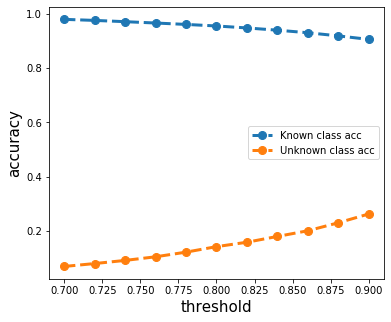

In [33]:
fig, ax = plt.subplots(figsize=(6, 5))
ax.set_xlabel('threshold', fontsize=15)
ax.set_ylabel('accuracy', fontsize=15)

ax.plot(threshold_list, 
        known_accs,  
        label='Known class acc', 
        marker='o', 
        linestyle='dashed',
        linewidth=3, 
        markersize=8)
ax.plot(threshold_list, 
        unknown_accs, 
        label="Unknown class acc",
        marker='o', 
        linestyle='dashed',
        linewidth=3, 
        markersize=8)
ax.legend()
plt.show()

## Count where the samples exit

In [34]:
import matplotlib.pyplot as plt

In [35]:
known_exit, known_rts, unknown_exit, unknown_rts, predictions = get_exit_stats(original_labels=original_labels,
                                                                                target_labels=target_labels,
                                                                                probs=probs,
                                                                                rts=rts,
                                                                               top_1_threshold=0.90)

In [36]:
known_exit_count = np.unique(np.array(known_exit), return_counts=True)

In [37]:
known_exit_count[1]

array([30728,  3467,  1055,   272,  3828])

<BarContainer object of 5 artists>

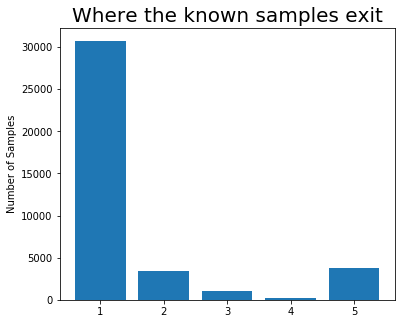

In [38]:
fig, ax = plt.subplots(figsize=(6, 5))
ax.set_ylabel('Number of Samples', fontsize=10)
ax.set_title('Where the known samples exit', fontsize=20)

ax.bar(known_exit_count[0]+1, height=known_exit_count[1])

In [39]:
unknown_exit_count = np.unique(np.array(unknown_exit), return_counts=True)

<BarContainer object of 5 artists>

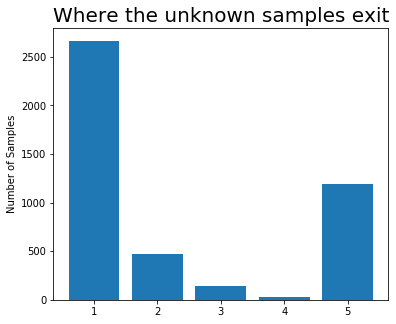

In [40]:
fig, ax = plt.subplots(figsize=(6, 5))
ax.set_ylabel('Number of Samples', fontsize=10)
ax.set_title('Where the unknown samples exit', fontsize=20)

ax.bar(unknown_exit_count[0]+1, height=unknown_exit_count[1])

## Count the CM for known and unknown

In [41]:
known_accs, unknown_accs = get_threshold_curve(thresholds=[0.9])

35637 3713 3317 1183


In [42]:
print(known_accs, unknown_accs)

[0.9056416772554002] [0.2628888888888889]


In [43]:
known_rts_clf5 = rts[:len(known_exit), 4]
unknown_rts_clf = rts[len(known_exit):, 4]

In [44]:
print(np.median(known_rts_clf5),np.median(unknown_rts_clf))

0.02931975293904543 0.03172642318531871


In [45]:
print(np.mean(known_rts_clf5),np.mean(unknown_rts_clf))

0.030699893621895864 0.03267030275933858


In [46]:
print(np.median(known_rts),np.median(unknown_rts))

0.009946127887815237 0.01151929353363812


In [47]:
print(np.mean(known_rts),np.mean(unknown_rts))

0.013426438220474854 0.01816980642101003
